## Análise de dados gerados de uma simulação Artery

Para mais infos: https://docs.omnetpp.org/tutorials/pandas/

In [1]:
# Importa as bibliotecas usadas para análise de dados
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

A função abaixo será utilizada mais pra frente, mas deve ser definida logo no começo. Como os vetores e histogramas do omnetpp são interpretados como strings, os valores devem ser separados em substrings e depois convertidos em floats (numéricos com decimais) se forem não-vazios.

In [2]:
def createFloatList(str):
    valuesList = str.split(' ')
    return [float(item) for item in valuesList if item]

### Executa comando de terminal para converter resultado da simulação para csv

In [12]:
! scavetool x Obstacles-#0.sca Obstacles-#0.vec -o Obstacles.csv 

Exported 27 vectors


### Gera um dataframe a partir do csv gerado pelo scavetool dos valores escalares

In [13]:
obstacles = pd.read_csv('Obstacles.csv')
obstacles = obstacles[(obstacles.type!='runattr') & (obstacles.type!='param')]
print('Elementos totais: ', obstacles.size)
obstacles.head(10)

Elementos totais:  459


,run,type,module,name,attrname,attrvalue,value,vectime,vecvalue
31,Obstacles-0-20220917-13:13:45-6292,vector,CanvasWorld.node[0].middleware.CAM,transmission:vector(camStationId),NaN,NaN,NaN,0.271518936497 0.471518936497 0.671518936497 0...,2546248239 2546248239 2546248239 2546248239 25...
32,Obstacles-0-20220917-13:13:45-6292,attr,CanvasWorld.node[0].middleware.CAM,transmission:vector(camStationId),source,CamSent,NaN,NaN,NaN
33,Obstacles-0-20220917-13:13:45-6292,vector,CanvasWorld.node[0].middleware.CAM,transmission:vector(camGenerationDeltaTime),NaN,NaN,NaN,0.271518936497 0.471518936497 0.671518936497 0...,29256 29456 29656 29856 30756 31556 32356 3315...
34,Obstacles-0-20220917-13:13:45-6292,attr,CanvasWorld.node[0].middleware.CAM,transmission:vector(camGenerationDeltaTime),source,CamSent,NaN,NaN,NaN
35,Obstacles-0-20220917-13:13:45-6292,vector,CanvasWorld.node[0].middleware.CAM,transmission:vector(camSpeed),NaN,NaN,NaN,0.271518936497 0.471518936497 0.671518936497 0...,8 23 37 52 108 159 210 257 303 355 398 447 492...
36,Obstacles-0-20220917-13:13:45-6292,attr,CanvasWorld.node[0].middleware.CAM,transmission:vector(camSpeed),source,CamSent,NaN,NaN,NaN
37,Obstacles-0-20220917-13:13:45-6292,vector,CanvasWorld.node[1].middleware.CAM,transmission:vector(camStationId),NaN,NaN,NaN,10.279172503343 10.479172503343 10.67917250334...,2051556033 2051556033 2051556033 2051556033 20...
38,Obstacles-0-20220917-13:13:45-6292,attr,CanvasWorld.node[1].middleware.CAM,transmission:vector(camStationId),source,CamSent,NaN,NaN,NaN
39,Obstacles-0-20220917-13:13:45-6292,vector,CanvasWorld.node[1].middleware.CAM,transmission:vector(camGenerationDeltaTime),NaN,NaN,NaN,10.279172503343 10.479172503343 10.67917250334...,39256 39456 39656 39856 40756 41656 42556 4345...
40,Obstacles-0-20220917-13:13:45-6292,attr,CanvasWorld.node[1].middleware.CAM,transmission:vector(camGenerationDeltaTime),source,CamSent,NaN,NaN,NaN


### Identifica quantos módulos e nomes de parâmetros distintos existem no arquivo em análise

Neste contexto, um módulo é um componente da pilha dos protocolos em execução na simulação. Cada um destes módulos emite seus próprios dados ao longo da execução do cenário, que podem então ser analisados em busca de parâmetros de performance. 

Assim, listar todos os módulos pode ser utilizado para facilitar a busca de qual dado queremos avaliar 

In [14]:
registered_modules = obstacles.module.unique()
print(registered_modules)

['CanvasWorld.node[0].middleware.CAM' 'CanvasWorld.node[1].middleware.CAM'
 'CanvasWorld.node[2].middleware.CAM' 'CanvasWorld.node[3].middleware.CAM'
 'CanvasWorld.node[1].middleware.Receiver'
 'CanvasWorld.node[3].middleware.Receiver'
 'CanvasWorld.node[2].middleware.Receiver']


In [15]:
registered_names = obstacles.name.unique()
print(registered_names)

['transmission:vector(camStationId)'
 'transmission:vector(camGenerationDeltaTime)'
 'transmission:vector(camSpeed)' 'reception:vector(camStationId)'
 'reception:vector(camGenerationDeltaTime)' 'reception:vector(camSpeed)'
 'speedValues:vector']


Por exemplo se quisermos visualizar somente os dados em forma de vetores das mensagens CAM

In [16]:
vetores_CAM = obstacles[(obstacles.type=='vector') & (obstacles.module.str.contains('CanvasWorld.node\\[\\d\\].middleware.CAM', regex=True) == True)]

vetores_CAM[['module','name','value']].head(15)

,module,name,value
31,CanvasWorld.node[0].middleware.CAM,transmission:vector(camStationId),NaN
33,CanvasWorld.node[0].middleware.CAM,transmission:vector(camGenerationDeltaTime),NaN
35,CanvasWorld.node[0].middleware.CAM,transmission:vector(camSpeed),NaN
37,CanvasWorld.node[1].middleware.CAM,transmission:vector(camStationId),NaN
39,CanvasWorld.node[1].middleware.CAM,transmission:vector(camGenerationDeltaTime),NaN
41,CanvasWorld.node[1].middleware.CAM,transmission:vector(camSpeed),NaN
43,CanvasWorld.node[0].middleware.CAM,reception:vector(camStationId),NaN
45,CanvasWorld.node[0].middleware.CAM,reception:vector(camGenerationDeltaTime),NaN
47,CanvasWorld.node[0].middleware.CAM,reception:vector(camSpeed),NaN
49,CanvasWorld.node[1].middleware.CAM,reception:vector(camStationId),NaN


In [17]:
print(vetores_CAM.name.unique())

['transmission:vector(camStationId)'
 'transmission:vector(camGenerationDeltaTime)'
 'transmission:vector(camSpeed)' 'reception:vector(camStationId)'
 'reception:vector(camGenerationDeltaTime)' 'reception:vector(camSpeed)']


Gera um gráfico contendo o conjunto de vetores de _transmission:vector(camSpeed)_ para cada nó de comunicação

In [18]:
speedValues = vetores_CAM[vetores_CAM.name=='transmission:vector(camSpeed)']
speedValues.head()

,run,type,module,name,attrname,attrvalue,value,vectime,vecvalue
35,Obstacles-0-20220917-13:13:45-6292,vector,CanvasWorld.node[0].middleware.CAM,transmission:vector(camSpeed),NaN,NaN,NaN,0.271518936497 0.471518936497 0.671518936497 0...,8 23 37 52 108 159 210 257 303 355 398 447 492...
41,Obstacles-0-20220917-13:13:45-6292,vector,CanvasWorld.node[1].middleware.CAM,transmission:vector(camSpeed),NaN,NaN,NaN,10.279172503343 10.479172503343 10.67917250334...,8 23 39 54 109 160 212 267 319 368 422 476 527...
59,Obstacles-0-20220917-13:13:45-6292,vector,CanvasWorld.node[2].middleware.CAM,transmission:vector(camSpeed),NaN,NaN,NaN,20.222232138552 20.422232138552 20.62223213855...,8 23 37 50 106 159 207 253 306 353 398 444 499...
77,Obstacles-0-20220917-13:13:45-6292,vector,CanvasWorld.node[3].middleware.CAM,transmission:vector(camSpeed),NaN,NaN,NaN,30.228280695947 30.428280695947 30.62828069594...,8 22 38 50 102 156 211 265 320 374 429 477 529...


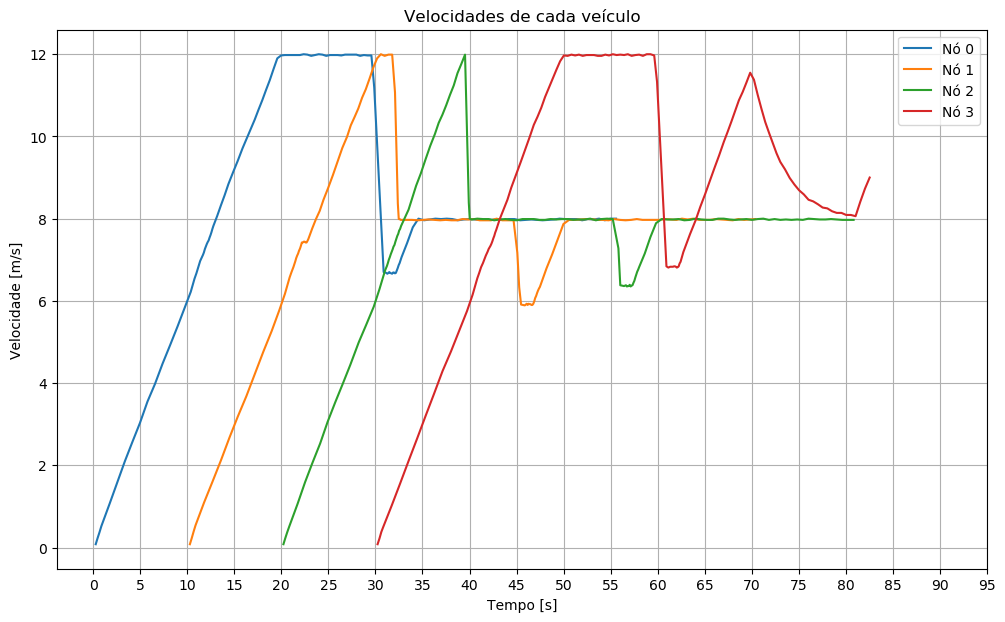

In [19]:
time = []
value = []

plt.figure(figsize=(12, 7))

for i in range(speedValues.module.nunique()):
    module_df = speedValues.iloc[i]
    time.append(createFloatList(module_df.vectime))
    value.append(createFloatList(module_df.vecvalue))
    plt.plot(time[i], np.divide(value[i],100), label='Nó %d'%(i))

plt.xticks(np.arange(0, 100, 5.0))
plt.grid()
plt.xlabel('Tempo [s]')
plt.ylabel('Velocidade [m/s]')
plt.title('Velocidades de cada veículo')
plt.legend()
plt.savefig('figures/Velocidades.png')
plt.show()


In [20]:
vetores_Receiver = obstacles[obstacles.module.str.contains('CanvasWorld.node\\[\\d\\].middleware.Receiver', regex=True) == True]

vetores_Receiver[['module','name','value']].head(15)

,module,name,value
79,CanvasWorld.node[1].middleware.Receiver,speedValues:vector,NaN
80,CanvasWorld.node[3].middleware.Receiver,speedValues:vector,NaN
81,CanvasWorld.node[2].middleware.Receiver,speedValues:vector,NaN
